In [1]:
from dask.distributed import Client

client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 7.66 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38423,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 7.66 GiB
Comm: tcp://127.0.0.1:33437,Total threads: 3
Dashboard: http://127.0.0.1:33061/status,Memory: 1.92 GiB
Nanny: tcp://127.0.0.1:38473,


In [2]:
import dask.dataframe as dd

ddf = dd.read_csv(r'../../dataset/NF-UNSW-NB15-v2/fe6cb615d161452c_MOHANAD_A4706/data/NF-UNSW-NB15-v2.csv')
ddf

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
npartitions=6,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,int64,object,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [3]:
ddf = ddf[(ddf['Attack'] == 'DoS') | (ddf['Attack'] == 'Benign')]
ddf.Attack.value_counts().compute()

Benign    2295222
DoS          5794
Name: Attack, dtype: int64

In [4]:
ddf = ddf.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'L4_SRC_PORT', 'L4_DST_PORT', 'Label', 'MAX_TTL', 'MIN_TTL'], axis = 1)

In [5]:
X = ddf.loc[:, ddf.columns != 'Attack']
X.head()

,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,...,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE
0,6,1.0,9,1,193,3,24,24,16,0,...,0,0,0,7240,0,0,0,0,0,331.0
1,6,1.0,261,5,469,7,24,24,24,0,...,0,0,8688,8688,18944,74,0,0,0,230.0
2,6,1.0,481,9,750,11,24,24,24,0,...,0,0,10136,10136,33792,132,0,0,0,229.0
3,6,1.0,701,13,1054,15,24,24,24,0,...,0,0,11584,11584,48640,190,0,0,0,125.0
4,6,1.0,1031,19,1474,21,24,24,24,0,...,0,0,14480,13032,64256,251,0,0,0,230.0


In [6]:
Y = ddf['Attack']
Y.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Attack, dtype: object

In [7]:
from dask_ml.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the string labels to integer classes
y_encoded = label_encoder.fit_transform(Y)

# # Print the mapping between original labels and encoded classes
# label_mapping = dict(zip(Y, y_encoded))
# print("Label Mapping:", label_mapping)

# # Reverse transform: Convert encoded classes back to original labels
# y_decoded = label_encoder.inverse_transform(y_encoded)
# print("Reverse Labels:", y_decoded)

2023-11-16 14:16:47,841 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.43 GiB -- Worker memory limit: 1.92 GiB


In [8]:
from dask_ml.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.35, convert_mixed_types=True)

2023-11-16 14:16:52,943 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.36 GiB -- Worker memory limit: 1.92 GiB


In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(verbose=1)

In [10]:
import joblib
with joblib.parallel_backend('dask'):
     model.fit(X_train, y_train)
     predictions = model.predict(X_test)

2023-11-16 14:16:59,170 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.47 GiB -- Worker memory limit: 1.92 GiB
2023-11-16 14:17:06,279 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.41 GiB -- Worker memory limit: 1.92 GiB
[Parallel(n_jobs=-1)]: Using backend DaskDistributedBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
2023-11-16 14:18:35,151 - distributed.worker.memory - WARNING - Unmanaged

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

2023-11-16 14:18:44,067 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.42 GiB -- Worker memory limit: 1.92 GiB
2023-11-16 14:18:56,076 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.38 GiB -- Worker memory limit: 1.92 GiB


Accuracy: 0.9993568085785346


2023-11-16 14:19:08,352 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.35 GiB -- Worker memory limit: 1.92 GiB
2023-11-16 14:19:14,471 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.45 GiB -- Worker memory limit: 1.92 GiB


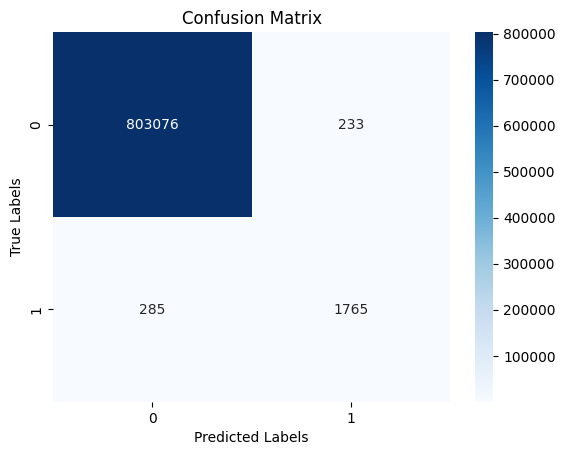

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_true' is your true labels and 'y_pred' is your predicted labels
conf_matrix = confusion_matrix(y_test, predictions)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


1. PROTOCOL: 0.0800974329724117
2. MAX_TTL: 0.07885588289185927
3. MIN_TTL: 0.07208259919178044
4. SRC_TO_DST_AVG_THROUGHPUT: 0.056119626248687604
5. DST_TO_SRC_SECOND_BYTES: 0.04916337413784174
6. OUT_BYTES: 0.048834934577287964
7. IN_BYTES: 0.04687489870426503
8. MAX_IP_PKT_LEN: 0.043854614287503035
9. SHORTEST_FLOW_PKT: 0.04233407072069536
10. LONGEST_FLOW_PKT: 0.04193616733096202
11. SRC_TO_DST_SECOND_BYTES: 0.04119322195505738
12. L7_PROTO: 0.03849152159897932
13. DST_TO_SRC_AVG_THROUGHPUT: 0.03420335088398681
14. RETRANSMITTED_OUT_BYTES: 0.03288643149606945
15. NUM_PKTS_UP_TO_128_BYTES: 0.028420896979540616
16. MIN_IP_PKT_LEN: 0.027811708844150015
17. ICMP_TYPE: 0.027460913066433962
18. ICMP_IPV4_TYPE: 0.024885614604597647
19. CLIENT_TCP_FLAGS: 0.02357526454337581
20. IN_PKTS: 0.02332584216902854
21. RETRANSMITTED_IN_BYTES: 0.02184992925323242
22. OUT_PKTS: 0.016731775774764358
23. TCP_FLAGS: 0.013704770503547185
24. TCP_WIN_MAX_IN: 0.013634503083590979
25. RETRANSMITTED_OUT_PKTS

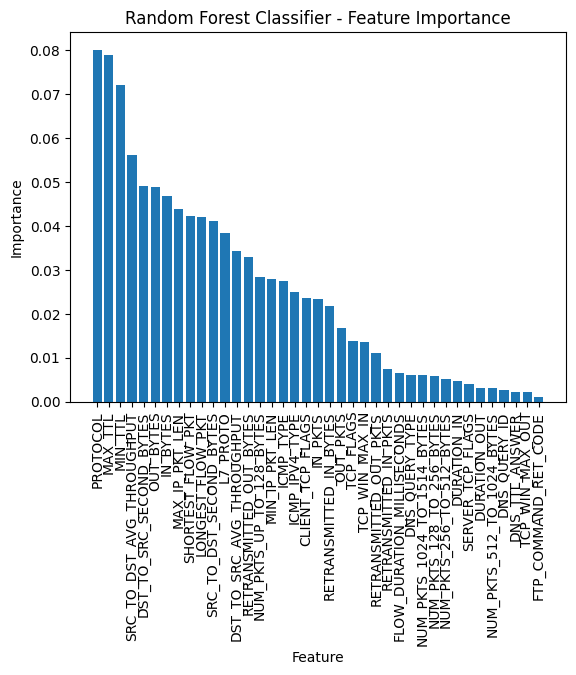

In [13]:
import numpy as np

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get the indices of features sorted by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the names of the features
feature_names = X.columns

# Print the importance of each feature
for i, idx in enumerate(sorted_indices):
    print(f"{i + 1}. {feature_names[idx]}: {feature_importances[idx]}")

# Plotting the feature importances
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()